# МГТУ им. Н.Э.Баумана | ИУ5 | 6 семестр | ТМО | РК№1

ИУ5-63Б | Ювенский Лев | Вариант № 19


**Заданиe:** https://github.com/ugapanyuk/courses_current/wiki/TMO_RK_1

https://www.kaggle.com/datasets/carlolepelaars/toy-dataset

Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

Задача №3. Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?


## Загрузка и первичный анализ

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [3]:
df0 = pd.read_csv("/toy_dataset.csv")
df0.info()
df0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## "Ящик с усами" (boxplot)

Построим график "ящик с усами" (boxplot) для колонки "Income" с разбивкой по колонке "Gender"

<Axes: title={'center': 'Income'}, xlabel='Gender'>

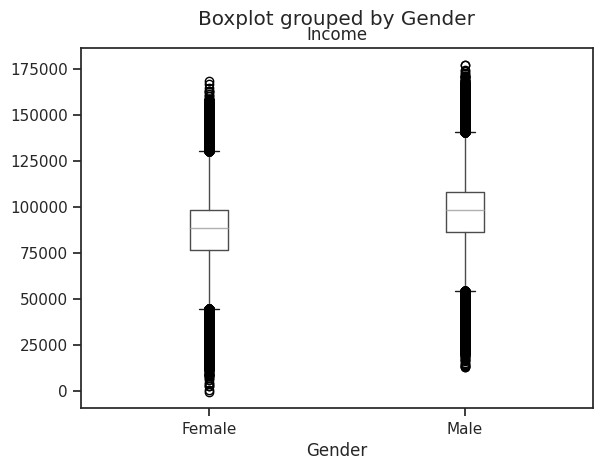

In [7]:
df0.boxplot(column='Income', by='Gender', grid=False)

## Масштабирование данных

Произведём масштабирование данных колонки "Income" при помощи двух методов: MinMax масштабирование (MinMaxScaler) и Масштабирование данных на основе Z-оценки (StandardScaler).



**MinMax масштабирование:**

$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.

**Масштабирование данных на основе Z-оценки:**

$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

Стандартизированная оценка (z-оценка) - это мера относительного разброса наблюдаемого или измеренного значения, которая показывает, сколько стандартных отклонений составляет его разброс относительного среднего значения.


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [28]:
sc1 = MinMaxScaler()
df0_sc1 = sc1.fit_transform(df0[['Income']])

sc2 = StandardScaler()
df0_sc2 = sc2.fit_transform(df0[['Income']])

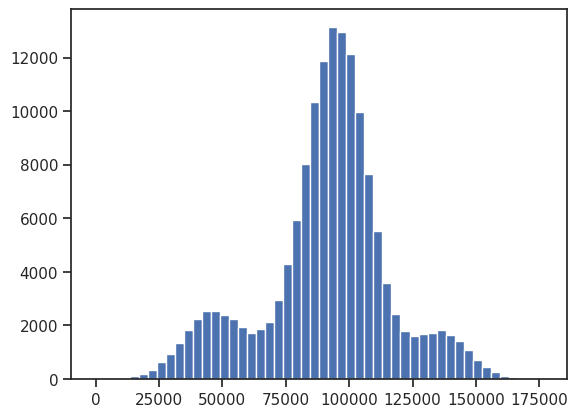

In [23]:
plt.hist(df0['Income'], 50)
plt.show()

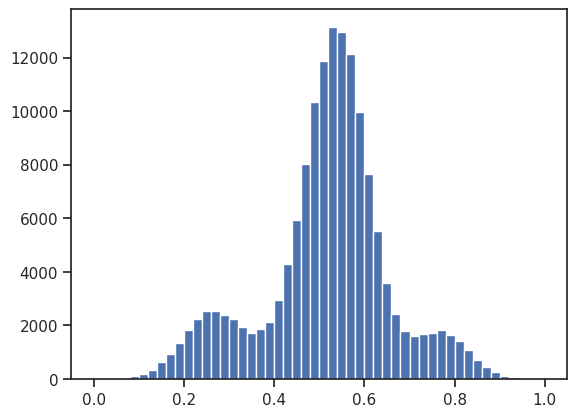

In [25]:
plt.hist(df0_sc1, 50)
plt.show()

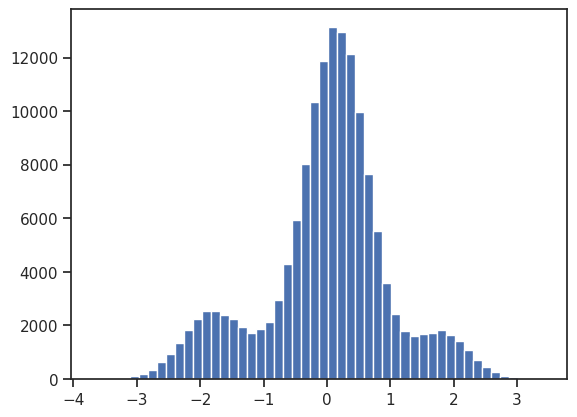

In [26]:
plt.hist(df0_sc2, 50)
plt.show()

## Преобразование категориальных признаков в количественные

Преобразуем категориальный признак "City" в количественный с использованием двух методов: "Label encoding" и "One hot encoding"

### Label encoding

Ориентирован на применение к одному признаку. Предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.

Сопоставляет значению категориального признака целое неотрицательное число

In [31]:
from sklearn.preprocessing import LabelEncoder

In [33]:
LE = LabelEncoder()

df0['CityLE'] = LE.fit_transform(df0['City'])

In [34]:
df0.head()

,Number,City,Gender,Age,Income,Illness,CityLE
0,1,Dallas,Male,41,40367.0,No,2
1,2,Dallas,Male,54,45084.0,No,2
2,3,Dallas,Male,42,52483.0,No,2
3,4,Dallas,Male,40,40941.0,No,2
4,5,Dallas,Male,46,50289.0,No,2


Уникализируем строки по значению колонки "City", чтобы наглядко продемонстрировать кодирование для всех возможных значений данного поля

In [35]:
unique_rows_LE = df0.drop_duplicates(subset='City')
unique_rows_LE

,Number,City,Gender,Age,Income,Illness,CityLE
0,1,Dallas,Male,41,40367.0,No,2
19707,19708,New York City,Male,49,112226.0,No,5
70014,70015,Los Angeles,Male,34,102868.0,No,3
102187,102188,Mountain View,Male,31,150367.0,No,4
116406,116407,Boston,Female,57,87004.0,No,1
124707,124708,Washington D.C.,Male,38,62295.0,No,7
132827,132828,San Diego,Female,39,105138.0,No,6
137708,137709,Austin,Male,53,103971.0,No,0


### One hot encoding

Каждое уникальное значение признака становится новым отдельным признаком.


In [36]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
OHE = OneHotEncoder()
df0_ohe = OHE.fit_transform(df0[['City']])

In [41]:
df0_ohe.shape

(150000, 8)

In [42]:
df0_ohe.todense()[0:10]

matrix([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.]])